In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats
import pickle

## 제안 3 : 연도별 커뮤니티 게시글에 있는 키워드에 대한 감성분석

In [3]:
df_dcinside = pd.read_csv("./teamkim_datas.SNS_DCinside.csv")
df_helpline = pd.read_csv("./teamkim_datas.SNS_helpline.csv")
df_naver_symptom = pd.read_csv("./teamkim_datas.SNS_naver_kin_symptom.csv")

In [4]:
df_dcinside["date"] = pd.to_datetime(df_dcinside["date"]).dt.strftime("%Y")
df_helpline["date"] = pd.to_datetime(df_helpline["date"]).dt.strftime("%Y")
df_naver_symptom['question_datetime'] = df_naver_symptom['question_datetime'].str.replace('작성일\\n', '').str.strip()
# "조회수"라는 값이 포함되어있는 행을 모두 지우는 코드
df_naver_symptom = df_naver_symptom[~df_naver_symptom['question_datetime'].str.contains('조회수')]
df_naver_symptom['question_datetime'] = pd.to_datetime(df_naver_symptom['question_datetime']).dt.strftime("%Y")
df_naver_symptom = df_naver_symptom.reset_index()

In [5]:
dc_2020_title = df_dcinside.query("date == '2020'")["title"].to_list()
dc_2020_contents = df_dcinside.query("date == '2020'")["contents"].to_list()
list_dc_2020 = dc_2020_title + dc_2020_contents
helpline_2020_title = df_helpline.query("date == '2020'")["title_disease"].to_list()
helpline_2020_post = df_helpline.query("date == '2020'")["post_contents"].to_list()
helpline_2020_reply = df_helpline.query("date == '2020'")["reply_contents"].to_list()
list_helpline_2020 = helpline_2020_title + helpline_2020_post + helpline_2020_reply
naver_2020_title = df_naver_symptom.query("question_datetime == '2020'")["question_title"].to_list()
naver_2020_question = df_naver_symptom.query("question_datetime == '2020'")["question_content"].to_list()
naver_2020_answer = df_naver_symptom.query("question_datetime == '2020'")["answer1_content"].to_list()
list_naver_2020 = naver_2020_title + naver_2020_question + naver_2020_answer
list_2020 = list_dc_2020 + list_helpline_2020 + list_naver_2020

In [7]:
dc_2022_title = df_dcinside.query("date == '2022'")["title"].to_list()
dc_2022_contents = df_dcinside.query("date == '2022'")["contents"].to_list()
list_dc_2022 = dc_2022_title + dc_2022_contents
helpline_2022_title = df_helpline.query("date == '2022'")["title_disease"].to_list()
helpline_2022_post = df_helpline.query("date == '2022'")["post_contents"].to_list()
helpline_2022_reply = df_helpline.query("date == '2022'")["reply_contents"].to_list()
list_helpline_2022 = helpline_2022_title + helpline_2022_post + helpline_2022_reply
naver_2022_title = df_naver_symptom.query("question_datetime == '2022'")["question_title"].to_list()
naver_2022_question = df_naver_symptom.query("question_datetime == '2022'")["question_content"].to_list()
naver_2022_answer = df_naver_symptom.query("question_datetime == '2022'")["answer1_content"].to_list()
list_naver_2022 = naver_2022_title + naver_2022_question + naver_2022_answer
list_2022 = list_dc_2022 + list_helpline_2022 + list_naver_2022

In [8]:
dc_2023_title = df_dcinside.query("date == '2023'")["title"].to_list()
dc_2023_contents = df_dcinside.query("date == '2023'")["contents"].to_list()
list_dc_2023 = dc_2023_title + dc_2023_contents
helpline_2023_title = df_helpline.query("date == '2023'")["title_disease"].to_list()
helpline_2023_post = df_helpline.query("date == '2023'")["post_contents"].to_list()
helpline_2023_reply = df_helpline.query("date == '2023'")["reply_contents"].to_list()
list_helpline_2023 = helpline_2023_title + helpline_2023_post + helpline_2023_reply
naver_2023_title = df_naver_symptom.query("question_datetime == '2023'")["question_title"].to_list()
naver_2023_question = df_naver_symptom.query("question_datetime == '2023'")["question_content"].to_list()
naver_2023_answer = df_naver_symptom.query("question_datetime == '2023'")["answer1_content"].to_list()
list_naver_2023 = naver_2023_title + naver_2023_question + naver_2023_answer
list_2023 = list_dc_2023 + list_helpline_2023 + list_naver_2023

In [9]:
dc_2024_title = df_dcinside.query("date == '2024'")["title"].to_list()
dc_2024_contents = df_dcinside.query("date == '2024'")["contents"].to_list()
list_dc_2024 = dc_2024_title + dc_2024_contents
helpline_2024_title = df_helpline.query("date == '2024'")["title_disease"].to_list()
helpline_2024_post = df_helpline.query("date == '2024'")["post_contents"].to_list()
helpline_2024_reply = df_helpline.query("date == '2024'")["reply_contents"].to_list()
list_helpline_2024 = helpline_2024_title + helpline_2024_post + helpline_2024_reply
naver_2024_title = df_naver_symptom.query("question_datetime == '2024'")["question_title"].to_list()
naver_2024_question = df_naver_symptom.query("question_datetime == '2024'")["question_content"].to_list()
naver_2024_answer = df_naver_symptom.query("question_datetime == '2024'")["answer1_content"].to_list()
list_naver_2024 = naver_2024_title + naver_2024_question + naver_2024_answer
list_2024 = list_dc_2024 + list_helpline_2024 + list_naver_2024

In [11]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [22]:
from textblob import TextBlob

# 분석할 문장들의 리스트 = list_2020

# 감정 분석 결과를 저장할 딕셔너리 초기화
sentiment_counts_2020 = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

# 각 문장에 대한 감정 분석
for sentence in list_2020:
    blob = TextBlob(sentence)
    sentiment = blob.sentiment.polarity
    # 감정 평가를 바탕으로 빈도수 계산
    if sentiment > 0:
        sentiment_counts_2020['Positive'] += 1
    elif sentiment < 0:
        sentiment_counts_2020['Negative'] += 1
    else:
        sentiment_counts_2020['Neutral'] += 1

# 결과 출력
print(f"긍정적 문장의 수: {sentiment_counts_2020['Positive']}")
print(f"부정적 문장의 수: {sentiment_counts_2020['Negative']}")
print(f"중립적 문장의 수: {sentiment_counts_2020['Neutral']}")

긍정적 문장의 수: 5
부정적 문장의 수: 11
중립적 문장의 수: 406


In [23]:
# 분석할 문장들의 리스트 = list_2022

# 감정 분석 결과를 저장할 딕셔너리 초기화
sentiment_counts_2022 = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

# 각 문장에 대한 감정 분석
for sentence in list_2022:
    blob = TextBlob(sentence)
    sentiment = blob.sentiment.polarity
    # 감정 평가를 바탕으로 빈도수 계산
    if sentiment > 0:
        sentiment_counts_2022['Positive'] += 1
    elif sentiment < 0:
        sentiment_counts_2022['Negative'] += 1
    else:
        sentiment_counts_2022['Neutral'] += 1

# 결과 출력
print(f"긍정적 문장의 수: {sentiment_counts_2022['Positive']}")
print(f"부정적 문장의 수: {sentiment_counts_2022['Negative']}")
print(f"중립적 문장의 수: {sentiment_counts_2022['Neutral']}")

긍정적 문장의 수: 3
부정적 문장의 수: 5
중립적 문장의 수: 624


In [24]:
# 분석할 문장들의 리스트 = list_2023

# 감정 분석 결과를 저장할 딕셔너리 초기화
sentiment_counts_2023 = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

# 각 문장에 대한 감정 분석
for sentence in list_2023:
    sentence_str = str(sentence)
    blob = TextBlob(sentence_str)
    sentiment = blob.sentiment.polarity
    # 감정 평가를 바탕으로 빈도수 계산
    if sentiment > 0:
        sentiment_counts_2023['Positive'] += 1
    elif sentiment < 0:
        sentiment_counts_2023['Negative'] += 1
    else:
        sentiment_counts_2023['Neutral'] += 1

# 결과 출력
print(f"긍정적 문장의 수: {sentiment_counts_2023['Positive']}")
print(f"부정적 문장의 수: {sentiment_counts_2023['Negative']}")
print(f"중립적 문장의 수: {sentiment_counts_2023['Neutral']}")

긍정적 문장의 수: 5
부정적 문장의 수: 10
중립적 문장의 수: 1422


In [25]:
# 분석할 문장들의 리스트 = list_2024

# 감정 분석 결과를 저장할 딕셔너리 초기화
sentiment_counts_2024 = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

# 각 문장에 대한 감정 분석
for sentence in list_2024:
    sentence_str = str(sentence)
    blob = TextBlob(sentence_str)
    sentiment = blob.sentiment.polarity
    # 감정 평가를 바탕으로 빈도수 계산
    if sentiment > 0:
        sentiment_counts_2024['Positive'] += 1
    elif sentiment < 0:
        sentiment_counts_2024['Negative'] += 1
    else:
        sentiment_counts_2024['Neutral'] += 1

# 결과 출력
print(f"긍정적 문장의 수: {sentiment_counts_2024['Positive']}")
print(f"부정적 문장의 수: {sentiment_counts_2024['Negative']}")
print(f"중립적 문장의 수: {sentiment_counts_2024['Neutral']}")

긍정적 문장의 수: 0
부정적 문장의 수: 5
중립적 문장의 수: 325


In [26]:
sentiment_counts_2020

{'Positive': 5, 'Negative': 11, 'Neutral': 406}

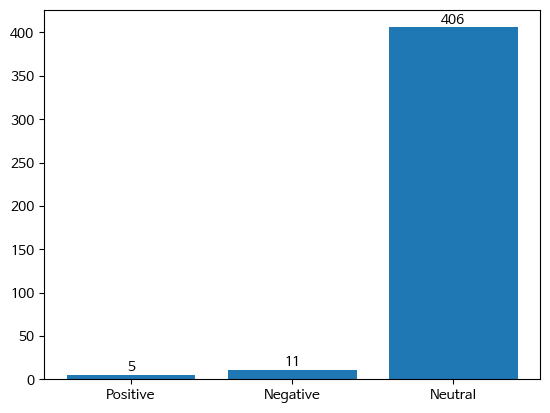

In [32]:
labels = sentiment_counts_2020.keys()
values = sentiment_counts_2020.values()
bars = plt.bar(labels, values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.show()

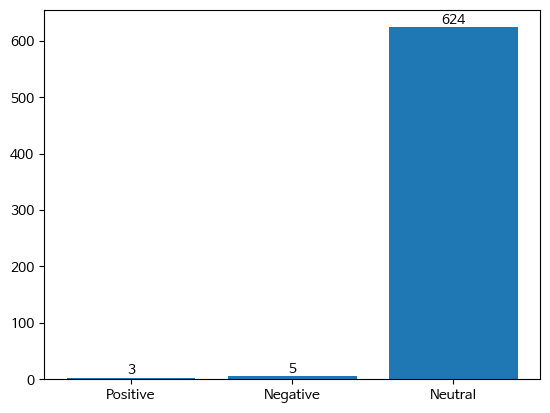

In [31]:
labels = sentiment_counts_2022.keys()
values = sentiment_counts_2022.values()
bars = plt.bar(labels, values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.show()

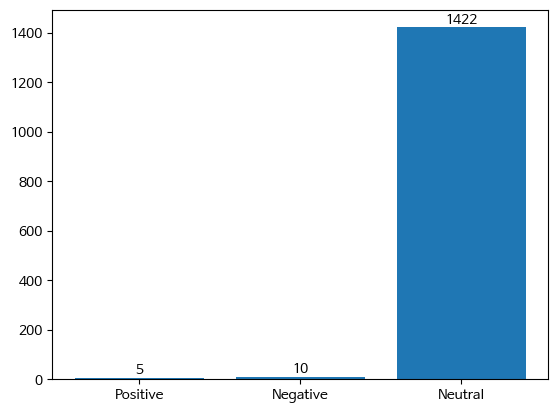

In [33]:
labels = sentiment_counts_2023.keys()
values = sentiment_counts_2023.values()
bars = plt.bar(labels, values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.show()

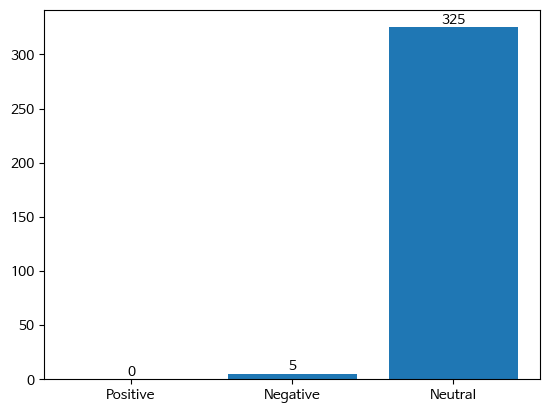

In [34]:
labels = sentiment_counts_2024.keys()
values = sentiment_counts_2024.values()
bars = plt.bar(labels, values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.show()